<a href="https://colab.research.google.com/github/Hasanctk/deeplearn-nlp/blob/main/deeplearn_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers # Regularizers eklendi
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
display(emotion_df.head())

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
display(violance_df.head())

,text,label
0,ENTRY 1260 : 12-14F . brother . raped sexually...,4
1,ketamine raped roommate also loved trusted & a...,4
2,sick terrorist absolutelY want life still stal...,4
3,family vacation makeup artist getting people r...,4
4,ENTRY 1274 : 17F . Friend 's friend . drugged ...,4


In [ ]:
display(hatee_df.head())

,text,label
0,everytime go cracker barrel girl great tits se...,1
1,"Run nigga , n't want nigga , need bad bitch 's...",1
2,need girl Jamaica ca n't fuck basic black bitches,1
3,"RT @ ShadowBeatz_Inc : know blocked , next wee...",1
4,Put ya hands Grade bitch,1


In [ ]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [ ]:
violance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22002 entries, 0 to 22001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22002 non-null  object
 1   label   22002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 343.9+ KB


In [ ]:
hatee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20593 entries, 0 to 20592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20593 non-null  object
 1   label   20593 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 321.9+ KB


In [87]:
stop_words=set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/emotions")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'emotions' dataset.
Path to dataset files: /kaggle/input/emotions


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/gender-based-violence-tweet-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gender-based-violence-tweet-classification' dataset.
Path to dataset files: /kaggle/input/gender-based-violence-tweet-classification


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hate-speech-and-offensive-language-dataset' dataset.
Path to dataset files: /kaggle/input/hate-speech-and-offensive-language-dataset


In [ ]:
try:
    emotion_df = pd.read_csv('/kaggle/input/emotions/text.csv', index_col=False)
    violance_df = pd.read_csv('/kaggle/input/gender-based-violence-tweet-classification/Train.csv')
    hate_df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')
    print("Veri setleri başarıyla yüklendi.")
except FileNotFoundError:
    print("HATA: Dosya yolları bulunamadı.")

Veri setleri başarıyla yüklendi.


In [ ]:
violance_df.drop(columns=['Tweet_ID'], inplace=True, errors='ignore')

emotion_df.rename(columns={'text': 'text', 'label': 'label'}, inplace=True)
# The following lines are removed because hate_df and violance_df already have 'text' and 'label' columns based on the kernel state.
# violance_df.rename(columns={'tweet': 'text', 'type': 'label'}, inplace=True)
# hate_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

def stratified_sample(df, label_col, n_samples_per_class, random_state=42):
    return pd.concat(
        [
            df[df[label_col] == label].sample(
                n=n_samples_per_class, random_state=random_state
            )
            for label in df[label_col].unique()
        ],
        ignore_index=True,
    )

def sample_specific_class(df, label_col, specific_label, n_samples, random_state=42):
    specific_class_df = df[df[label_col] == specific_label].sample(
        n=n_samples, random_state=random_state
    )
    rest_df = df[df[label_col] != specific_label]
    return pd.concat([specific_class_df, rest_df], axis=0).reset_index(drop=True)

# Veri sayılarını biraz azalttık , dengeledik
e_df = stratified_sample(emotion_df, 'label', 4000)
violance_df = sample_specific_class(
    violance_df, 'label', 'sexual_violence', 15000
)
hatee_df = sample_specific_class(hate_df, 'label', 1, 15000)  # Biraz azalttık

e_df.reset_index(drop=True, inplace=True)
violance_df.reset_index(drop=True, inplace=True)
hatee_df.reset_index(drop=True, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
violance_df['label'] = label_encoder.fit_transform(violance_df['label'])

stop_words = set(stopwords.words('english'))
def clean_text_column(df, column='text'):
    df[column] = df[column].apply(lambda x: ' '.join([
        word for word in nltk.word_tokenize(str(x))
        if word.lower() not in stop_words
    ]))
    return df

print("Metin temizliği yapılıyor...")
e_df = clean_text_column(e_df)
violance_df = clean_text_column(violance_df)
hatee_df = clean_text_column(hatee_df)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([e_df['text'], violance_df['text'], hatee_df['text']]))

max_length = 60
emotion_padding = pad_sequences(tokenizer.texts_to_sequences(e_df['text']), maxlen=max_length, padding='post')
violance_padding = pad_sequences(tokenizer.texts_to_sequences(violance_df['text']), maxlen=max_length, padding='post')
hate_padding = pad_sequences(tokenizer.texts_to_sequences(hatee_df['text']), maxlen=max_length, padding='post')

emotion_labels = np.array(e_df['label'])
volance_label = np.array(violance_df['label'])
hate_label = np.array(hatee_df['label'])

Metin temizliği yapılıyor...


In [ ]:
# minumum sample adedei bulduk
min_samples = min(emotion_padding.shape[0], violance_padding.shape[0], hate_padding.shape[0])

# emotion dataset
np.random.seed(42)
emotion_indices = np.random.choice(emotion_padding.shape[0], min_samples, replace=False)
emotion_padding_sampled = emotion_padding[emotion_indices]
emotion_labels_sampled = emotion_labels[emotion_indices]

# violence dataset
np.random.seed(42)
violence_indices = np.random.choice(violance_padding.shape[0], min_samples, replace=False)
violance_padding_sampled = violance_padding[violence_indices]
volance_label_sampled = volance_label[violence_indices]
#zaten minum adetee
hate_padding_sampled = hate_padding
hate_label_sampled = hate_label

X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(
    emotion_padding_sampled, emotion_labels_sampled, test_size=0.3, random_state=42
)
X_train_violence, X_test_violence, y_train_violence, y_test_violence = train_test_split(
    violance_padding_sampled, volance_label_sampled, test_size=0.3, random_state=42
)
X_train_hate, X_test_hate, y_train_hate, y_test_hate = train_test_split(
    hate_padding_sampled, hate_label_sampled, test_size=0.3, random_state=42
)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100 # 128'den 100'e düşürüldü(bundan önce overfiting aldığım için değerlerde oynama yaptım)
lstm_units = 32     # 64'ten 32'ye düşürüldü (Ezberlemeyi azaltmak için)
dropout_rate = 0.5
l2_penalty = 0.001  # L2 ceza katsayısı

# --- Ortak Katmanlar ---
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# DÜZELTME 1: SpatialDropout1D
# Normal Dropout rastgele nöronları kapatır, SpatialDropout tüm feature map'i kapatır.
# Metin verilerinde overfitting'e karşı daha etkilidir.
spatial_dropout = layers.SpatialDropout1D(0.4)

# DÜZELTME 2: L2 Regularization (kernel_regularizer)
# LSTM ağırlıklarının aşırı büyümesini engeller.
shared_lstm = layers.LSTM(
    lstm_units,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(l2_penalty),
    recurrent_regularizer=regularizers.l2(l2_penalty)
)

shared_pooling = layers.GlobalAveragePooling1D()
shared_bn = layers.BatchNormalization()
shared_dropout = layers.Dropout(dropout_rate)

def create_input_branch(name):
    inp = layers.Input(shape=(max_length,), name=name)
    x = embedding_layer(inp)
    x = spatial_dropout(x) # Spatial Dropout burada kullanıldı
    x = shared_lstm(x)
    x = shared_pooling(x)
    x = shared_bn(x)
    x = shared_dropout(x)
    return inp, x

# Giriş Dallarını Oluşturma
emotion_input, emotion_features = create_input_branch('emotion_input')
violence_input, violence_features = create_input_branch('violence_input')
hate_input, hate_features = create_input_branch('hate_input')

# --- Çıkış Katmanları ---
# DÜZELTME 3: Çıkış katmanlarına da L2 ekledik
emotion_output = layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='emotion_out')(emotion_features)
violence_output = layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='violence_out')(violence_features)
hate_output = layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='hate_out')(hate_features)

model = models.Model(
    inputs=[emotion_input, violence_input, hate_input],
    outputs=[emotion_output, violence_output, hate_output]
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 60, 100)   │  5,845,900 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 60, 100)   │          0 │ embedding_2[0][0… │
│ (SpatialDropout1D)  │                   │            │ embedding_2[1][0… │
│                     │                   │            │ embedding_2[2][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 60, 32)    │     17,024 │ spatial_dropout1… │
│                     │                   │            │ spatial_dropout1… │
│                     │                   │            │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ lstm_2[0][0],     │
│ (GlobalAveragePool… │                   │            │ lstm_2[1][0],     │
│                     │                   │            │ lstm_2[2][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_out (Dense) │ (None, 6)         │        198 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_out        │ (None, 5)         │        165 │ dropout_2[1][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_out (Dense)    │ (None, 3)         │         99 │ dropout_2[2][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,863,514 (22.37 MB)

 Trainable params: 5,863,450 (22.37 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Başlangıç Learning Rate'ini biraz düşürdük (0.001 -> 0.0005)(eski verilerin plotu tumadım ama bu hücredeki çizdilen plot yetersiz geldiğiiçin tekrar oynama yaptım.)
# diğer hücrelerde görüceksiniz
opt = optimizers.Adam(learning_rate=0.0005)

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'accuracy', 'accuracy'] # Düzeltme: Her çıkış için bir metrik belirtildi
)

# Early Stopping: Sabrı biraz azalttık (Patience: 3)(öğrenme verimi düştüğünde veriyi öğrenmeye devam ediyordu değişikliğe gittim)
# Overfitting başladığı anda durması için.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=0.00001,
    verbose=1
)

In [ ]:
print("Eğitim Başlıyor (Overfitting Korumalı)...")#(yukarıda belirtiğim gibi ilk yazdığımda overfitting oluyordu)

history = model.fit(
    x={
        'emotion_input': X_train_emotion,
        'violence_input': X_train_violence,
        'hate_input': X_train_hate
    },
    y={
        'emotion_out': y_train_emotion.astype('int32'),
        'violence_out': y_train_violence.astype('int32'),
        'hate_out': y_train_hate.astype('int32')
    },
    epochs=20,
    batch_size=64,   # Batch size artırıldı, gradyanlar daha stabil olur
    validation_split=0.1, # Train verisinin %10'u doğrulama için ayrıldı
    callbacks=[early_stopping, lr_scheduler]
)

Eğitim Başlıyor (Overfitting Korumalı)...
Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - emotion_out_accuracy: 0.2003 - emotion_out_loss: 1.8273 - hate_out_accuracy: 0.5171 - hate_out_loss: 1.0322 - loss: 4.1734 - violence_out_accuracy: 0.5717 - violence_out_loss: 1.1647 - val_emotion_out_accuracy: 0.2746 - val_emotion_out_loss: 1.6403 - val_hate_out_accuracy: 0.7885 - val_hate_out_loss: 0.5458 - val_loss: 2.4322 - val_violence_out_accuracy: 0.9556 - val_violence_out_loss: 0.1489 - learning_rate: 5.0000e-04
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - emotion_out_accuracy: 0.4150 - emotion_out_loss: 1.3975 - hate_out_accuracy: 0.8649 - hate_out_loss: 0.4782 - loss: 2.1209 - violence_out_accuracy: 0.9653 - violence_out_loss: 0.1481 - val_emotion_out_accuracy: 0.4175 - val_emotion_out_loss: 1.3222 - val_hate_out_accuracy: 0.8419 - val_hate_out_loss: 0.4275 - val_loss: 1.9289 - val_violence_out_accuracy: 0.9792 - val_violence_out_loss: 0.0936 - learning_rate: 5.0000e

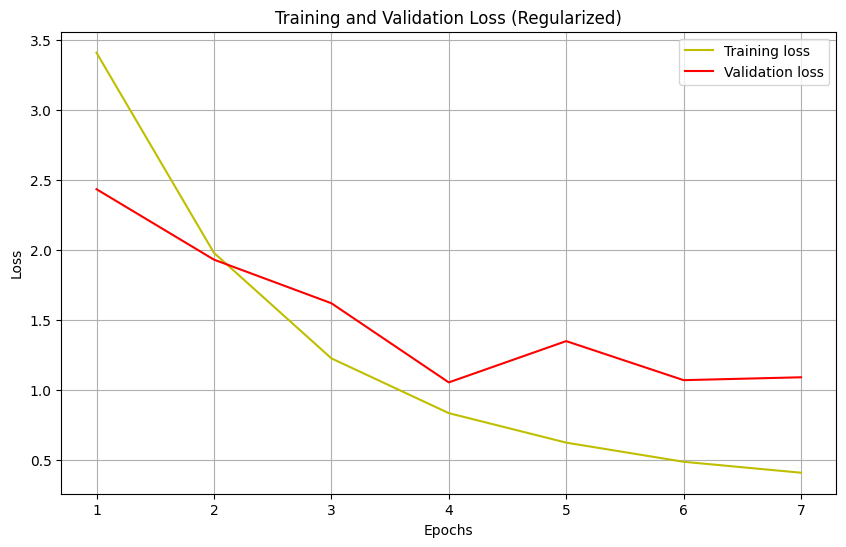

In [ ]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss (Regularized)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)

In [ ]:
# emotion ve violence için 80 ila 90 lık doğru tahmın yüzdem var ama hatee için class 0 hariç aynı değerlere sahibim aşağıda hücrelerde görüceksiniz

predictions = model.predict({
    'emotion_input': X_test_emotion,
    'violence_input': X_test_violence,
    'hate_input': X_test_hate
})

emotion_pred = np.argmax(predictions[0], axis=1)
violence_pred = np.argmax(predictions[1], axis=1)
hate_pred = np.argmax(predictions[2], axis=1)

print("\n--- EMOTION REPORT ---")
print(classification_report(y_test_emotion, emotion_pred))

print("\n--- VIOLENCE REPORT ---")
print(classification_report(y_test_violence, violence_pred))

print("\n--- HATE REPORT ---")
print(classification_report(y_test_hate, hate_pred))

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step

--- EMOTION REPORT ---
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1037
           1       0.97      0.62      0.76      1012
           2       0.76      0.99      0.86      1030
           3       0.88      0.89      0.89      1016
           4       0.91      0.79      0.85      1047
           5       0.87      0.94      0.90      1036

    accuracy                           0.85      6178
   macro avg       0.87      0.85      0.85      6178
weighted avg       0.87      0.85      0.85      6178


--- VIOLENCE REPORT ---
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        48
           1       0.97      1.00      0.98      1628
           2       0.90      0.46      0.61        61
           3       0.90      0.92      0.91       178
           4       1.00      0.99      0.99      4263

    accuracy                           0

## optimizasyon
Model tanımındaki `l2_penalty` değerini 0.001'den 0.002'ye ve `SpatialDropout1D` oranını 0.4'ten 0.5'e çıkararak modeldeki düzenlileştirme parametrelerini artır.


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100 # 128'den 100'e düşürüldü
lstm_units = 32     # 64'ten 32'ye düşürüldü (Ezberlemeyi azaltmak için)
dropout_rate = 0.5
l2_penalty = 0.002  # L2 ceza katsayısı 0.001'den 0.002'ye artırıldı

# --- Ortak Katmanlar ---
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# DÜZELTME 1: SpatialDropout1D
# Normal Dropout rastgele nöronları kapatır, SpatialDropout tüm feature map'i kapatır.
# Metin verilerinde overfitting'e karşı daha etkilidir.
spatial_dropout = layers.SpatialDropout1D(0.5) # Oran 0.4'ten 0.5'e çıkarıldı

# DÜZELTME 2: L2 Regularization (kernel_regularizer)
# LSTM ağırlıklarının aşırı büyümesini engeller.
shared_lstm = layers.LSTM(
    lstm_units,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(l2_penalty),
    recurrent_regularizer=regularizers.l2(l2_penalty)
)

shared_pooling = layers.GlobalAveragePooling1D()
shared_bn = layers.BatchNormalization()
shared_dropout = layers.Dropout(dropout_rate)

def create_input_branch(name):
    inp = layers.Input(shape=(max_length,), name=name)
    x = embedding_layer(inp)
    x = spatial_dropout(x) # Spatial Dropout burada kullanıldı
    x = shared_lstm(x)
    x = shared_pooling(x)
    x = shared_bn(x)
    x = shared_dropout(x)
    return inp, x

# Giriş Dallarını Oluşturma
emotion_input, emotion_features = create_input_branch('emotion_input')
violence_input, violence_features = create_input_branch('violence_input')
hate_input, hate_features = create_input_branch('hate_input')

# --- Çıkış Katmanları ---
# DÜZELTME 3: Çıkış katmanlarına da L2 ekledik
emotion_output = layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='emotion_out')(emotion_features)
violence_output = layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='violence_out')(violence_features)
hate_output = layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2_penalty), name='hate_out')(hate_features)

model = models.Model(
    inputs=[emotion_input, violence_input, hate_input],
    outputs=[emotion_output, violence_output, hate_output]
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 60, 100)   │  5,845,900 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_1 │ (None, 60, 100)   │          0 │ embedding_3[0][0… │
│ (SpatialDropout1D)  │                   │            │ embedding_3[1][0… │
│                     │                   │            │ embedding_3[2][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 60, 32)    │     17,024 │ spatial_dropout1… │
│                     │                   │            │ spatial_dropout1… │
│                     │                   │            │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ lstm_3[0][0],     │
│ (GlobalAveragePool… │                   │            │ lstm_3[1][0],     │
│                     │                   │            │ lstm_3[2][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_out (Dense) │ (None, 6)         │        198 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_out        │ (None, 5)         │        165 │ dropout_3[1][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_out (Dense)    │ (None, 3)         │         99 │ dropout_3[2][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,863,514 (22.37 MB)

 Trainable params: 5,863,450 (22.37 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# daha önce overfitting başlandığında daha geç tepki veriyordu onu dengeledim
opt = optimizers.Adam(learning_rate=0.0005)

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'accuracy', 'accuracy'] # Düzeltme: Her çıkış için bir metrik belirtildi
)

# Early Stopping: Sabrı biraz azalttık (Patience: 3)
# Overfitting başladığı anda durması için.
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=0.00001,
    verbose=1
)

In [ ]:
print("Eğitim Başlıyor (Overfitting Korumalı)...")

history = model.fit(
    x={
        'emotion_input': X_train_emotion,
        'violence_input': X_train_violence,
        'hate_input': X_train_hate
    },
    y={
        'emotion_out': y_train_emotion.astype('int32'),
        'violence_out': y_train_violence.astype('int32'),
        'hate_out': y_train_hate.astype('int32')
    },
    epochs=20,
    batch_size=64,   # Batch size artırıldı, gradyanlar daha stabil olur
    validation_split=0.1, # Train verisinin %10'u doğrulama için ayrıldı(optimum değeri bulmak için elimden geleni yaptım en ideal adlığım değer buydu.)
    callbacks=[early_stopping, lr_scheduler]
)

Eğitim Başlıyor (Overfitting Korumalı)...
Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - emotion_out_accuracy: 0.1963 - emotion_out_loss: 1.8806 - hate_out_accuracy: 0.4938 - hate_out_loss: 1.0546 - loss: 4.3456 - violence_out_accuracy: 0.6289 - violence_out_loss: 1.1264 - val_emotion_out_accuracy: 0.1720 - val_emotion_out_loss: 2.2115 - val_hate_out_accuracy: 0.2268 - val_hate_out_loss: 1.5458 - val_loss: 4.1164 - val_violence_out_accuracy: 0.9528 - val_violence_out_loss: 0.1867 - learning_rate: 5.0000e-04
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 38s 145ms/step - emotion_out_accuracy: 0.3935 - emotion_out_loss: 1.4886 - hate_out_accuracy: 0.8311 - hate_out_loss: 0.5858 - loss: 2.4090 - violence_out_accuracy: 0.9621 - violence_out_loss: 0.1640 - val_emotion_out_accuracy: 0.4466 - val_emotion_out_loss: 1.4223 - val_hate_out_accuracy: 0.8433 - val_hate_out_loss: 0.5203 - val_loss: 2.1939 - val_violence_out_accuracy: 0.9674 - val_violence_out_loss: 0.0975 - learning_rate: 5.0000e

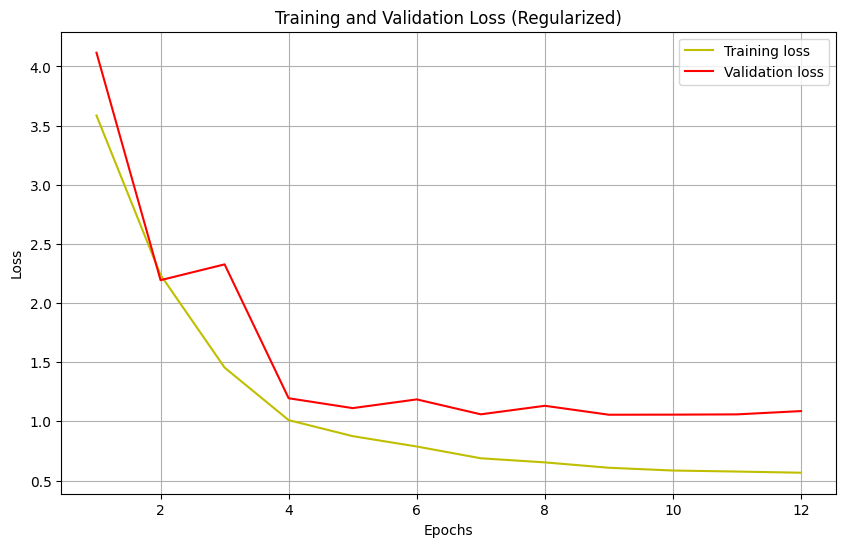

In [ ]:
# aldığım değer oranları göre çıkardığım plotaan az olsa memnunum elimden geldiğince overfitting önüne geçmeye çalıştım tanserflow düz kullanmak yerine
# tenserflow kenser ile kullanmayaı tercih ettim.
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss (Regularized)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)

In [ ]:
predictions = model.predict({
    'emotion_input': X_test_emotion,
    'violence_input': X_test_violence,
    'hate_input': X_test_hate
})

emotion_pred = np.argmax(predictions[0], axis=1)
violence_pred = np.argmax(predictions[1], axis=1)
hate_pred = np.argmax(predictions[2], axis=1)

print("\n--- EMOTION REPORT ---")
print(classification_report(y_test_emotion, emotion_pred))

print("\n--- VIOLENCE REPORT ---")
print(classification_report(y_test_violence, violence_pred))

print("\n--- HATE REPORT ---")
print(classification_report(y_test_hate, hate_pred))

194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step

--- EMOTION REPORT ---
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1037
           1       0.79      0.87      0.83      1012
           2       0.87      0.91      0.89      1030
           3       0.94      0.85      0.89      1016
           4       0.90      0.76      0.82      1047
           5       0.82      0.97      0.89      1036

    accuracy                           0.86      6178
   macro avg       0.87      0.86      0.86      6178
weighted avg       0.87      0.86      0.86      6178


--- VIOLENCE REPORT ---
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        48
           1       0.98      1.00      0.99      1628
           2       0.98      0.66      0.78        61
           3       0.96      0.92      0.94       178
           4       0.99      0.99      0.99      4263

    accuracy                           0


--- Overall Accuracy ---
Emotion Accuracy: 0.8635
Violence Accuracy: 0.9879
Hate Accuracy: 0.8624


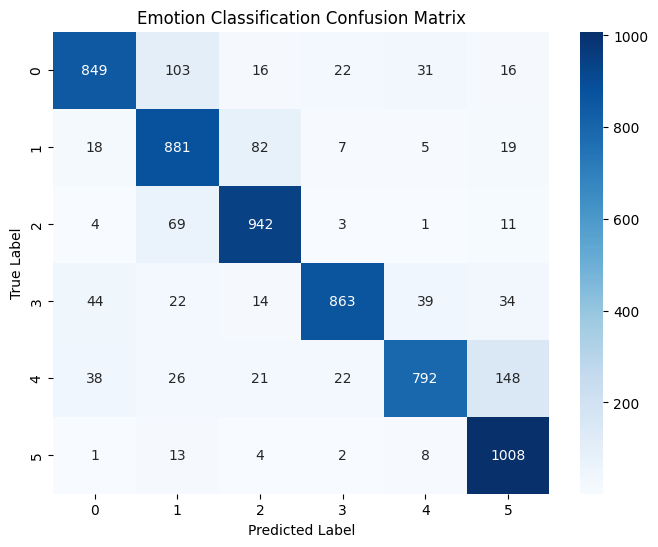

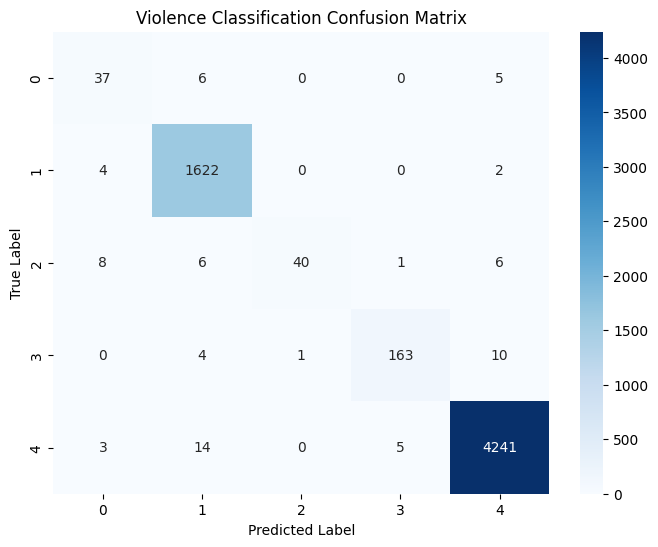

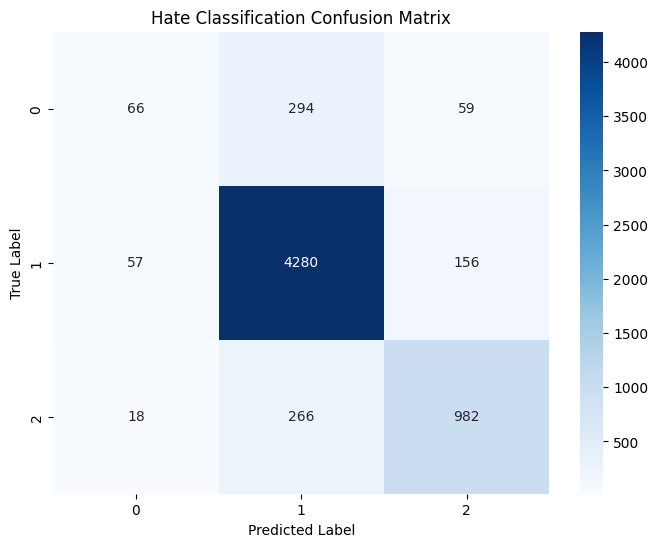

In [ ]:
print("\n--- Overall Accuracy ---")
print(f"Emotion Accuracy: {np.mean(y_test_emotion == emotion_pred):.4f}")
print(f"Violence Accuracy: {np.mean(y_test_violence == violence_pred):.4f}")
print(f"Hate Accuracy: {np.mean(y_test_hate == hate_pred):.4f}")


def plot_confusion_matrix(y_true, y_pred, title, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Emotion Confusion Matrix
plot_confusion_matrix(y_test_emotion, emotion_pred, 'Emotion Classification Confusion Matrix', labels=[str(i) for i in range(6)])

# Violence Confusion Matrix
plot_confusion_matrix(y_test_violence, violence_pred, 'Violence Classification Confusion Matrix', labels=[str(i) for i in range(5)])

# Hate Confusion Matrix
plot_confusion_matrix(y_test_hate, hate_pred, 'Hate Classification Confusion Matrix', labels=[str(i) for i in range(3)])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# origin dataset
original_indices_hate = np.arange(len(hate_padding))
_, test_indices_hate, _, _ = train_test_split(
    original_indices_hate, hate_label, test_size=0.3, random_state=42
)

# local yanlış tespitklere bakmak için
misclassified_local_indices = np.where(y_test_hate != hate_pred)[0]

original_hatee_df_indices = test_indices_hate[misclassified_local_indices]
#doğru yanlış ayrımı hatee için sınıf 0 için baya yanlış çıkıyor kalan sınıflarda yüzde 80-90 doğruluk payı var.
hate_labels_map = {
    0: 'Hate Speech',
    1: 'Offensive Language',
    2: 'Neither'
}

misclassified_hate_samples = pd.DataFrame({
    'text': hatee_df.loc[original_hatee_df_indices, 'text'],
    'true_label': y_test_hate[misclassified_local_indices],
    'predicted_label': hate_pred[misclassified_local_indices]
})

misclassified_hate_samples['true_label_text'] = misclassified_hate_samples['true_label'].map(hate_labels_map)
misclassified_hate_samples['predicted_label_text'] = misclassified_hate_samples['predicted_label'].map(hate_labels_map)
print(f"Total misclassified hate samples: {len(misclassified_hate_samples)}")
display(misclassified_hate_samples.head(10))
print("\nDistribution of True vs Predicted Labels for Misclassified Samples:")
display(pd.crosstab(misclassified_hate_samples['true_label_text'], misclassified_hate_samples['predicted_label_text']))

Total misclassified hate samples: 850


,text,true_label,predicted_label,true_label_text,predicted_label_text
19031,RT @ SnipersInPeril : @ ShinSnipes happy birth...,0,1,Hate Speech,Offensive Language
15752,@ Gutierrez_Alf legit retard,0,1,Hate Speech,Offensive Language
15994,@ NOT_UR_BRO @ niccol3_xo lmao nigga shoulda s...,0,1,Hate Speech,Offensive Language
7513,RT @ gioisblack : Goodbye faggot http : //t.co...,1,0,Offensive Language,Hate Speech
18490,RT @ D9Rize : @ TerrorFranchise @ D9Oxy Stfu f...,0,1,Hate Speech,Offensive Language
16650,@ kirstynehbu faggot,0,1,Hate Speech,Offensive Language
16415,@ carolinebakkk bumblebees ....,2,1,Neither,Offensive Language
15333,& # 8220 ; @ alicia_688 : aint special niglet ...,0,1,Hate Speech,Offensive Language
812,take Notre Dame still trash . http : //t.co/fR...,1,2,Offensive Language,Neither
17998,Lynch mob thugs threaten Zimmerman jury ; & # ...,0,1,Hate Speech,Offensive Language



Distribution of True vs Predicted Labels for Misclassified Samples:


predicted_label_text,Hate Speech,Neither,Offensive Language
true_label_text,,,
Hate Speech,0,59,294
Neither,18,0,266
Offensive Language,57,156,0


In [88]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
def classify_text(input_text, threshold=0.5):
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    predictions = model.predict({
        'emotion_input': input_padded,
        'violence_input': input_padded,
        'hate_input': input_padded
    })

    emotion_probs = predictions[0][0]
    violence_probs = predictions[1][0]
    hate_probs = predictions[2][0]

    emotion_max = np.max(emotion_probs)
    violence_max = np.max(violence_probs)
    hate_max = np.max(hate_probs)

    probs_dict = {
        'Emotion': emotion_max,
        'Violence': violence_max,
        'Hate': hate_max
    }

    top_dataset = max(probs_dict, key=probs_dict.get)

    if top_dataset == 'Emotion':
        top_class = emotion_labels_text[np.argmax(emotion_probs)]
    elif top_dataset == 'Violence':
        top_class = violance_labels_text[np.argmax(violence_probs)]
    else:
        top_class = hate_labels_text[np.argmax(hate_probs)]

    return top_dataset, top_class

In [97]:
# düz kelime tahimini :D
if __name__ == "__main__":
    text = input("Please enter your text: ")
    top_dataset, top_class = classify_text(text)
    print(f"This text is related to dataset: {top_dataset}")
    print(f"Predicted class: {top_class}")

Please enter your text: bad bitch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This text is related to dataset: Hate
Predicted class: Neither
